# UT2: Fundamentos de R para Ciencia de Datos
## Introducción para usuarios de Python

Esta unidad establece las bases de R enfocándose en el **Análisis Exploratorio de Datos (EDA)**. A lo largo de este cuaderno, compararemos la sintaxis de R con la de Python para facilitar la transición.

### Objetivos de la sesión:
1. Comprender la estructura de datos rectangulares en R.
2. Dominar las estimaciones de localización (Media, Mediana, Robustez).
3. Evaluar la variabilidad y dispersión de los datos.
4. Analizar correlaciones y relaciones multivariantes.

--- 
## 1. Estructuras de Datos y Localización

En R, el objeto principal es el `data.frame`. A diferencia de Python, donde `pandas` es una librería externa, en R las funciones estadísticas básicas están integradas en el lenguaje base.

Estimaciones de Localización (El Centro de los Datos)   

El primer paso en cualquier análisis es determinar dónde se sitúa la mayor parte de los datos. Para ello contamos con varias "métricas estadísticas":   

- A. **La Media (Promedio)**     
Es la suma de todos los valores dividida por el número de valores ($n$).   
        *Punto débil*: Es extremadamente sensible a los valores atípicos (outliers).
- B. **La Mediana**   
Es el valor que ocupa la posición central cuando los datos están ordenados.   
        *Punto fuerte*: Es una métrica robusta. Si el salario de un CEO sube a 10 millones, la mediana de la empresa no cambia, pero la media sí.   
- C. **Media Truncada (Trimmed Mean)**    
Se calcula eliminando un número fijo de valores en cada extremo y luego promediando el resto.   
        *Uso*: Elimina la influencia de casos extremos sin perder la naturaleza de promedio de la media.



### Ejemplo 1: Cálculo de la Media y Mediana
Imagina que analizamos los tiempos de carga de un servidor en milisegundos.

In [1]:
# --- EJEMPLO EN R ---
tiempos <- c(105, 110, 108, 112, 120, 107, 450) # El 450 es un outlier

media <- mean(tiempos)
mediana <- median(tiempos)
media_truncada <- mean(tiempos, trim = 0.1)

cat("Media:", media, "\n")
cat("Mediana:", mediana, "\n")
cat("Media Truncada (10%):", media_truncada)

Media: 158.8571 
Mediana: 110 
Media Truncada (10%): 158.8571

In [ ]:
# --- EQUIVALENTE EN PYTHON ---
import numpy as np
from scipy import stats

tiempos = [105, 110, 108, 112, 120, 107, 450]

print(f"Media: {np.mean(tiempos)}")
print(f"Mediana: {np.median(tiempos)}")
print(f"Media Truncada: {stats.trim_mean(tiempos, 0.1)}")

### 1.2 Vocabulario Estadístico
Es fundamental que el alumno se familiarice con la terminología:

- **Feature** (Característica): Variable, columna, atributo, "X"

- **Outcome** (Resultado): Variable dependiente, respuesta, "y".

- **Records** (Registros): Casos, filas, observaciones.

## 2. Variabilidad y Visualización

La variabilidad mide qué tan dispersos están los datos. El **Boxplot** es la herramienta fundamental para visualizar esto.

### Conceptos Clave:
- **Desviación Estándar ($s$):** Es la raíz cuadrada de la varianza. Mide la distancia "típica" entre los datos y la media.Sensible a outliers.
- **Rango Intercuartílico - IQR:** Es la diferencia entre el percentil 75 (Q3) y el 25 (Q1). Define dónde está el 50% central de la población. Robusto. Mide la amplitud del 50% central de los datos.
- **Desviación Absoluta Mediana - MAD:** Es el equivalente robusto a la desviación estándar. No se ve afectada por valores extremos. Desviación absoluta respecto a la mediana.



Desviación Estándar: 571.638 
IQR: 40 
MAD: 29.652

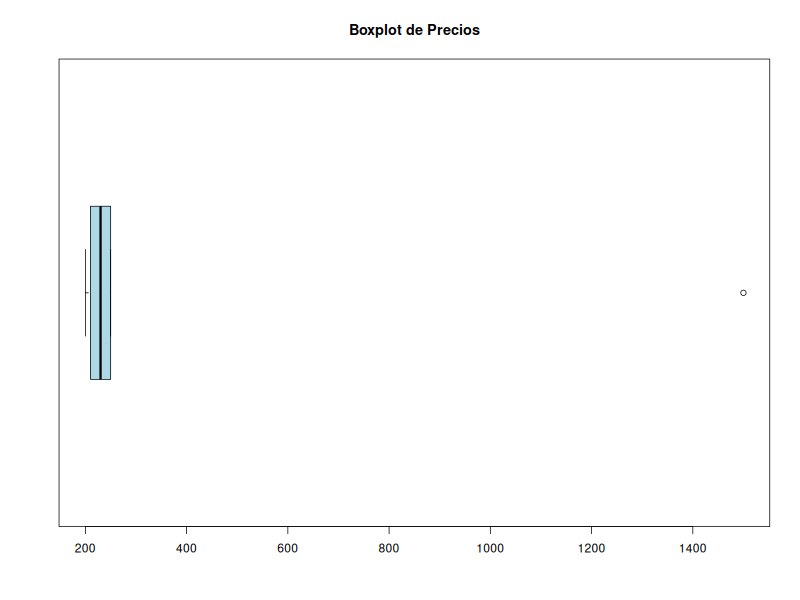

In [2]:
# --- VARIABILIDAD EN R ---
precios <- c(200, 210, 230, 250, 1500) # Precios en miles

sd_val <- sd(precios)     # Desviación estándar
iqr_val <- IQR(precios)   # Rango intercuartílico
mad_val <- mad(precios)   # Desviación absoluta mediana

cat("Desviación Estándar:", sd_val, "\n")
cat("IQR:", iqr_val, "\n")
cat("MAD:", mad_val)

boxplot(precios, horizontal = TRUE, main = "Boxplot de Precios", col = "lightblue")

## 3. Correlación y Relaciones
    

La correlación mide la fuerza y dirección de la relación lineal entre dos variables.   
- Coeficiente de Pearson ($r$):   
    - 1: Relación positiva perfecta.   
    - 0: No hay relación lineal.   
    - -1: Relación negativa perfecta.

Exploramos cómo interactúan dos variables mediante el coeficiente de **Pearson** ($r$).

Coeficiente de correlación: -0.7761684 


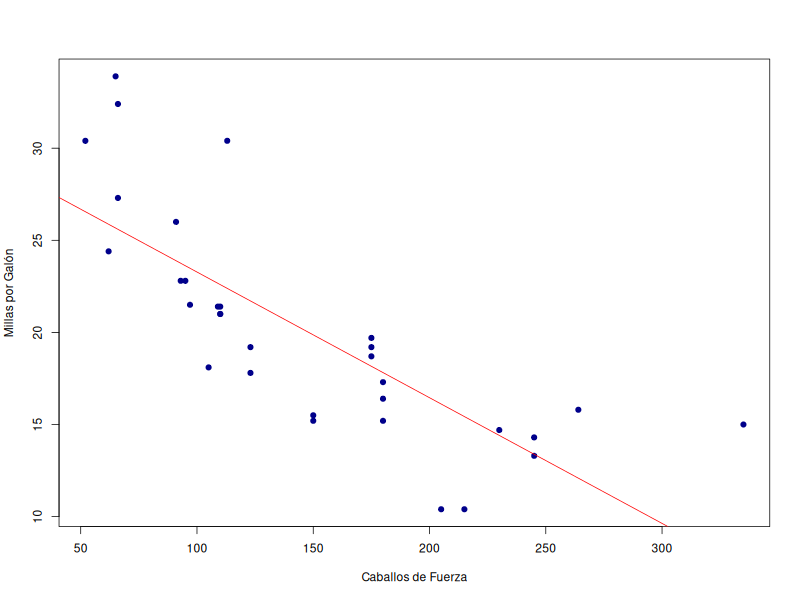

In [3]:
# --- CORRELACIÓN EN R ---
# Usaremos el dataset nativo 'mtcars'
# Relación entre Caballos de Fuerza (hp) y Millas por Galón (mpg)

correlacion <- cor(mtcars$hp, mtcars$mpg)
cat("Coeficiente de correlación:", correlacion, "\n")

plot(mtcars$hp, mtcars$mpg, pch = 19, col = "darkblue", 
     xlab = "Caballos de Fuerza", ylab = "Millas por Galón")
abline(lm(mpg ~ hp, data = mtcars), col = "red") # Línea de tendencia

--- 
## 4. Ejercicios de Consolidación

### Ejercicio A: Análisis de Datos de Salarios
1. Crea un vector en R llamado `salarios` con los valores: `2000, 2100, 1900, 2200, 8000`.
2. Calcula la media y la mediana.
3. Explica por qué la mediana es un mejor descriptor para este equipo de trabajo.

### Ejercicio B: Traducción Python-R
Traduce el siguiente código de Python a R:
```python
data = [5, 10, 15, 20, 25]
print(sum(data) / len(data))
```

### Ejercicio C: Boxplots Dinámicos
Utiliza el dataset `iris` (nativo en R). Ejecuta `boxplot(Sepal.Length ~ Species, data = iris)`. 
¿Qué especie tiene la mayor variabilidad en la longitud del sépalo?